In [1]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from autocorrect import Speller

In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')

fp_20news_train = r"20news/train.csv"
fp_20news_test = r"20news/test.csv"
fp_sst5_train = r"SST5/train.csv"
fp_sst5_test = r"SST5/test.csv"
data_train = pd.read_csv(fp_20news_train)
data_test = pd.read_csv(fp_20news_test)
data_train = pd.read_csv(fp_sst5_train)
data_test = pd.read_csv(fp_sst5_test)

In [3]:
def get_lemma_dict():
    with open('lemma.txt', 'r') as f:
        lines = f.readlines()
        lemma_dict = {}
        for line in lines:
            lemma, word = line.strip().split()
            lemma_dict[word] = lemma
    return lemma_dict

def preprocess_doc(doc):
    # Remove non-letters and numbers, unnecessary punctuations; transform to lower case
    doc = re.sub(r"[^A-Za-z0-9]", " ", doc).lower()
    # tokenization
    tokens = word_tokenize(doc)
    
    res = []
    for token in tokens:
        # lemmatization
        t = lemma_dict[token] if token in lemma_dict else token
        # spelling correction -- too slow
        # spell = Speller()
        # t = spell(t)
        # stop words
        if t not in stop_words and len(t)>=3:
            res.append(t)
    return res

lemma_dict = get_lemma_dict()
stop_words = set(stopwords.words("english"))

In [5]:
data_train["tokens"] = data_train["data"].apply(lambda x: preprocess_doc(x))
data_test["tokens"] = data_test["data"].apply(lambda x: preprocess_doc(x))
data_train

,data,target,tokens
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,"[lerxst, wam, umd, edu, thing, subject, car, n..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,"[guykuo, carson, washington, edu, guy, kuo, su..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,"[twillis, ecn, purdue, edu, thomas, willis, su..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,"[jgreen, amber, joe, green, subject, weitek, p..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,"[jcm, head, cfa, harvard, edu, jonathan, mcdow..."
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,"[jim, zisfein, factory, com, jim, zisfein, sub..."
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,"[ebodin, pearl, tuft, edu, subject, screen, de..."
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,"[westes, netcom, com, estes, subject, mount, c..."
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,"[steve, hcrlgw, steven, collins, subject, sphe..."


In [9]:
data_train["bigram"] = data_train["tokens"].apply(lambda x: [(x[i], x[i+1]) for i in range(len(x)-1)])
data_test["bigram"] = data_test["tokens"].apply(lambda x: [(x[i], x[i+1]) for i in range(len(x)-1)])
data_train

,data,target,tokens,bigram
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,"[lerxst, wam, umd, edu, thing, subject, car, n...","[(lerxst, wam), (wam, umd), (umd, edu), (edu, ..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,"[guykuo, carson, washington, edu, guy, kuo, su...","[(guykuo, carson), (carson, washington), (wash..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,"[twillis, ecn, purdue, edu, thomas, willis, su...","[(twillis, ecn), (ecn, purdue), (purdue, edu),..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,"[jgreen, amber, joe, green, subject, weitek, p...","[(jgreen, amber), (amber, joe), (joe, green), ..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,"[jcm, head, cfa, harvard, edu, jonathan, mcdow...","[(jcm, head), (head, cfa), (cfa, harvard), (ha..."
...,...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,"[jim, zisfein, factory, com, jim, zisfein, sub...","[(jim, zisfein), (zisfein, factory), (factory,..."
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,"[ebodin, pearl, tuft, edu, subject, screen, de...","[(ebodin, pearl), (pearl, tuft), (tuft, edu), ..."
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,"[westes, netcom, com, estes, subject, mount, c...","[(westes, netcom), (netcom, com), (com, estes)..."
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,"[steve, hcrlgw, steven, collins, subject, sphe...","[(steve, hcrlgw), (hcrlgw, steven), (steven, c..."


In [10]:
vocabulary = data_train.tokens.apply(pd.Series).stack().value_counts().to_dict()
vocabulary_bigram = data_train.bigram.apply(pd.Series).stack().value_counts().to_dict()

In [11]:
vocabulary

{'edu': 21321,
 'line': 13213,
 'subject': 12363,
 'com': 12134,
 'much': 11646,
 'organization': 11415,
 'write': 10178,
 'one': 9485,
 'use': 9072,
 'would': 8910,
 'get': 8236,
 'article': 7700,
 'post': 7500,
 'good': 7280,
 'say': 7116,
 'know': 6658,
 'think': 6189,
 'people': 6029,
 'like': 6021,
 'make': 5955,
 'university': 5648,
 'time': 5194,
 'may': 5084,
 'host': 5039,
 'see': 4861,
 'nntp': 4814,
 'max': 4777,
 'conjurer': 4308,
 'doe': 4169,
 'new': 4107,
 'system': 4092,
 'work': 4080,
 'year': 3990,
 'take': 3787,
 'little': 3771,
 'want': 3621,
 'right': 3516,
 'need': 3453,
 'way': 3377,
 'even': 3371,
 'state': 3369,
 'come': 3357,
 'look': 3331,
 'problem': 3331,
 'thing': 3327,
 'give': 3254,
 'well': 3220,
 'file': 3150,
 'find': 3129,
 'window': 3125,
 'god': 3121,
 'two': 3015,
 'many': 2945,
 'try': 2885,
 'question': 2849,
 'distribution': 2783,
 'call': 2746,
 'world': 2743,
 'run': 2716,
 'reply': 2683,
 'point': 2646,
 'drive': 2595,
 'mean': 2585,
 'anyon

In [12]:
vocabulary_bigram

{('nntp', 'post'): 4794,
 ('post', 'host'): 4786,
 ('max', 'max'): 3290,
 ('line', 'article'): 2983,
 ('organization', 'university'): 1801,
 ('line', 'nntp'): 1681,
 ('write', 'article'): 1501,
 ('distribution', 'world'): 982,
 ('edu', 'organization'): 914,
 ('g9v', 'g9v'): 850,
 ('netcom', 'com'): 841,
 ('line', 'distribution'): 803,
 ('usa', 'line'): 794,
 ('edu', 'write'): 773,
 ('distribution', 'usa'): 736,
 ('nasa', 'gov'): 734,
 ('mit', 'edu'): 732,
 ('university', 'line'): 720,
 ('uiuc', 'edu'): 707,
 ('a86', 'a86'): 689,
 ('apr', '1993'): 646,
 ('cmu', 'edu'): 634,
 ('edu', 'subject'): 615,
 ('would', 'like'): 611,
 ('b8f', 'b8f'): 609,
 ('state', 'university'): 600,
 ('computer', 'science'): 597,
 ('doe', 'anyone'): 541,
 ('cwru', 'edu'): 532,
 ('new', 'york'): 520,
 ('com', 'organization'): 518,
 ('newsreader', 'tin'): 510,
 ('145', '145'): 503,
 ('att', 'com'): 497,
 ('ohio', 'state'): 474,
 ('anyone', 'know'): 470,
 ('cso', 'uiuc'): 451,
 ('pitt', 'edu'): 443,
 ('world', 'n

In [80]:
n_features = 10000
n_bigram = 0

bigram2id = dict()
for i, item in enumerate(vocabulary.items()):
    if i >= (n_features-n_bigram):
        break
    bigram2id[item[0]] = i

for i, item in enumerate(vocabulary_bigram.items()):
    if i >= n_bigram:
        break
    bigram2id[item[0]] = (i + n_features - n_bigram)

In [41]:
# def extract_features(tokens):
#     features = []
#     for token in tokens:
#         if token in token2id:
#             features.append(token2id[token])
#     return features

def extract_features_bigram(tokens):
    features = []
    for token in tokens:
        if token in bigram2id:
            features.append(bigram2id[token])
    for i in range(len(tokens)-1):
        if (tokens[i], tokens[i+1]) in bigram2id:
            features.append(bigram2id[(tokens[i], tokens[i+1])])
    return features

In [81]:
# data_train["features"] = data_train["tokens"].apply(lambda x: extract_features(x))
# data_test["features"] = data_test["tokens"].apply(lambda x: extract_features(x))
data_train["features_bigram"] = (data_train["tokens"]+data_train["bigram"]).apply(lambda x: extract_features_bigram(x))
data_test["features_bigram"] = (data_test["tokens"]+data_test["bigram"]).apply(lambda x: extract_features_bigram(x))

In [66]:
data_train

,data,target,tokens,bigram,features_bigram
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,"[lerxst, wam, umd, edu, thing, subject, car, n...","[(lerxst, wam), (wam, umd), (umd, edu), (edu, ...","[3334, 1113, 0, 44, 2, 100, 25, 12, 23, 3334, ..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,"[guykuo, carson, washington, edu, guy, kuo, su...","[(guykuo, carson), (carson, washington), (wash...","[2615, 299, 0, 350, 7893, 2, 915, 3348, 705, 5..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,"[twillis, ecn, purdue, edu, thomas, willis, su...","[(twillis, ecn), (ecn, purdue), (purdue, edu),...","[1510, 1008, 0, 801, 4847, 2, 54, 5, 1008, 20,..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,"[jgreen, amber, joe, green, subject, weitek, p...","[(jgreen, amber), (amber, joe), (joe, green), ...","[7583, 978, 1123, 2, 7052, 7481, 5, 1874, 68, ..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,"[jcm, head, cfa, harvard, edu, jonathan, mcdow...","[(jcm, head), (head, cfa), (cfa, harvard), (ha...","[342, 6981, 911, 0, 2180, 2, 1266, 608, 54, 5,..."
...,...,...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,"[jim, zisfein, factory, com, jim, zisfein, sub...","[(jim, zisfein), (zisfein, factory), (factory,...","[352, 3991, 2457, 3, 352, 3991, 2, 3809, 2268,..."
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,"[ebodin, pearl, tuft, edu, subject, screen, de...","[(ebodin, pearl), (pearl, tuft), (tuft, edu), ...","[5757, 0, 2, 462, 392, 243, 704, 2952, 1, 5, 5..."
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,"[westes, netcom, com, estes, subject, mount, c...","[(westes, netcom), (netcom, com), (com, estes)...","[244, 3, 2, 1693, 1263, 1195, 3451, 81, 5, 66,..."
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,"[steve, hcrlgw, steven, collins, subject, sphe...","[(steve, hcrlgw), (hcrlgw, steven), (steven, c...","[293, 1591, 3445, 2, 3375, 60, 5, 1346, 165, 7..."


In [82]:
id2bigram = dict([(v, k) for k, v in bigram2id.items()])
data_train["features_bigram"].apply(lambda x: [id2bigram[i] for i in x])

0        [wam, umd, edu, thing, subject, car, nntp, pos...
1        [carson, washington, edu, guy, kuo, subject, c...
2        [ecn, purdue, edu, thomas, willis, subject, qu...
3        [jgreen, joe, green, subject, weitek, p9000, o...
4        [head, cfa, harvard, edu, jonathan, subject, s...
                               ...                        
11309    [jim, zisfein, factory, com, jim, zisfein, sub...
11310    [tuft, edu, subject, screen, death, mac, plus,...
11311    [netcom, com, subject, mount, cpu, cool, verti...
11312    [steve, steven, collins, subject, sphere, poin...
11313    [gun, cco, caltech, edu, kevin, gun, subject, ...
Name: features_bigram, Length: 11314, dtype: object

In [83]:
# list_train_features = data_train.features.to_list()
list_train_features_bigram = data_train.features_bigram.to_list()
list_train_labels = data_train.target.to_list()

# list_test_features = data_test.features.to_list()
list_test_features_bigram = data_test.features_bigram.to_list()
list_test_labels = data_test.target.to_list()

In [46]:
import random

def get_data_shuffled(features, labels):
    length = len(features)
    merge_list = [[features[i], labels[i]] for i in range(length)]
    random.shuffle(merge_list)
    return [merge_list[i][0] for i in range(length)], [merge_list[i][1] for i in range(length)]

In [47]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def evaluation(pred, labels):
    evals = dict()
    evals["accuracy"] = accuracy_score(pred, labels)
    evals["F1-macro"] = f1_score(pred, labels, average="macro")
    evals["F1-micro"] = f1_score(pred, labels, average="micro")
    return evals

class LogLinearModel:
    def __init__(self, n_classes, n_features, lr, alpha):
        self.n_classes = n_classes
        self.n_features = n_features
        self.lr = lr
        self.alpha = alpha
        self.w = [[0.0 for i in range(n_features)] for i in range(n_classes)]

    def transform(self, samples):
        labels = []
        list_scores = []
        for sample in samples:
            scores = []
            for i_label in range(self.n_classes):
                scores.append(sum([self.w[i_label][token] for token in sample]))
            scores = np.array(scores)
            scores = np.exp(scores-scores.max())  # math range error/overflow encounted in exp
            scores /= scores.sum()
            label = np.argmax(scores)
            labels.append(label)
            list_scores.append(scores.tolist())
        return labels, list_scores

    def update(self, samples, labels):
        _, list_scores = self.transform(samples)
        gradient = [[0.0 for i in range(self.n_features)] for k in range(self.n_classes)]
        for i_sample, sample in enumerate(samples):
            for i_feature in sample:
                for i_class in range(self.n_classes):
                    if i_class == labels[i_sample]:
                        gradient[i_class][i_feature] += 1.0
                    gradient[i_class][i_feature] -= (list_scores[i_sample][i_class] + self.alpha * self.w[i_class][i_feature])
        for i_class in range(self.n_classes):
            for i_feature in range(self.n_features):
                self.w[i_class][i_feature] += self.lr * gradient[i_class][i_feature]
        return

    def fit(self, samples, labels, batch_size):
        count = 0
        for i_batch in tqdm(range(len(samples) // batch_size + 1)):
            batch_samples = samples[count: count + batch_size]
            batch_labels = labels[count: count + batch_size]
            self.update(batch_samples, batch_labels)
            count += batch_size
        return

In [84]:
df_evals_bigram = pd.DataFrame(columns=["train-acc", "train-f1", "test-acc, test-f1"])
model_bigram = LogLinearModel(lr=0.01, n_features=10000, n_classes=20, alpha=0.0001)
for i in range(10):
    shuffled_f, shuffled_l = get_data_shuffled(list_train_features_bigram, list_train_labels)
    model_bigram.fit(shuffled_f, shuffled_l, batch_size=200)
    res_train = evaluation(model_bigram.transform(list_train_features_bigram)[0], list_train_labels)
    res_test = evaluation(model_bigram.transform(list_test_features_bigram)[0], list_test_labels)
    print("Epoch", i+1, "train acc =", res_train["accuracy"], "test acc =",res_test["F1-macro"])
    df_evals_bigram = df_evals_bigram.append({"train-acc": res_train["accuracy"], "train-f1": res_train["F1-macro"], "test-acc": res_test["accuracy"], "test-f1": res_test["F1-macro"]}, ignore_index=True)

  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 1 train acc = 0.864327382004596 test acc = 0.6770279714105099


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 2 train acc = 0.9363620293441753 test acc = 0.7134106244259827


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 3 train acc = 0.9665016793353367 test acc = 0.7367045447846342


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 4 train acc = 0.9803782923811207 test acc = 0.7463376892513139


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 5 train acc = 0.9870956337281245 test acc = 0.7455100593377761


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 6 train acc = 0.99151493724589 test acc = 0.7505546911168409


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 7 train acc = 0.994608449708326 test acc = 0.752127412421373


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 8 train acc = 0.9961110129043663 test acc = 0.7516900166801924


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 9 train acc = 0.9970832596782747 test acc = 0.7545090827635637


100%|██████████| 57/57 [00:17<00:00,  3.31it/s]


Epoch 10 train acc = 0.9972600318189854 test acc = 0.7586070133198948


<AxesSubplot:>

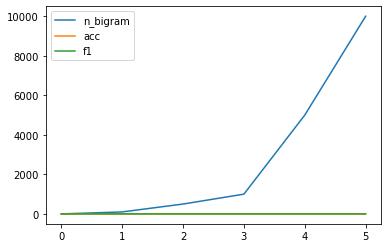

In [93]:
t = pd.DataFrame([[0, 0.398642534,0.361219485],[100, 0.395475113, 0.365728664], [500, 0.396832579, 0.362269962], [1000, 0.395475113, 0.364549266], [5000, 0.4, 0.366647487], [10000, 0.240723982, 0.23719429]], columns=["n_bigram", "acc", "f1"])
